<a href="https://colab.research.google.com/github/entenam/TF-Intro/blob/main/CNN_in_TensorFlow_W1Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-01-10 12:04:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 209.85.146.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   227MB/s    in 0.3s    

2022-01-10 12:04:46 (227 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

zipFName = './cats_and_dogs_filtered.zip'
zipRef = zipfile.ZipFile(zipFName, 'r')
zipRef.extractall()
zipRef.close()

In [ ]:
base_dir = './cats_and_dogs_filtered/'

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

val_cats_dir = os.path.join(valid_dir, 'cats')
val_dogs_dir = os.path.join(valid_dir, 'dogs')

train_cats_names = os.listdir(train_cats_dir)
train_dogs_names = os.listdir(train_dogs_dir)

val_cats_names = os.listdir(val_cats_dir)
val_dogs_names = os.listdir(val_dogs_dir)

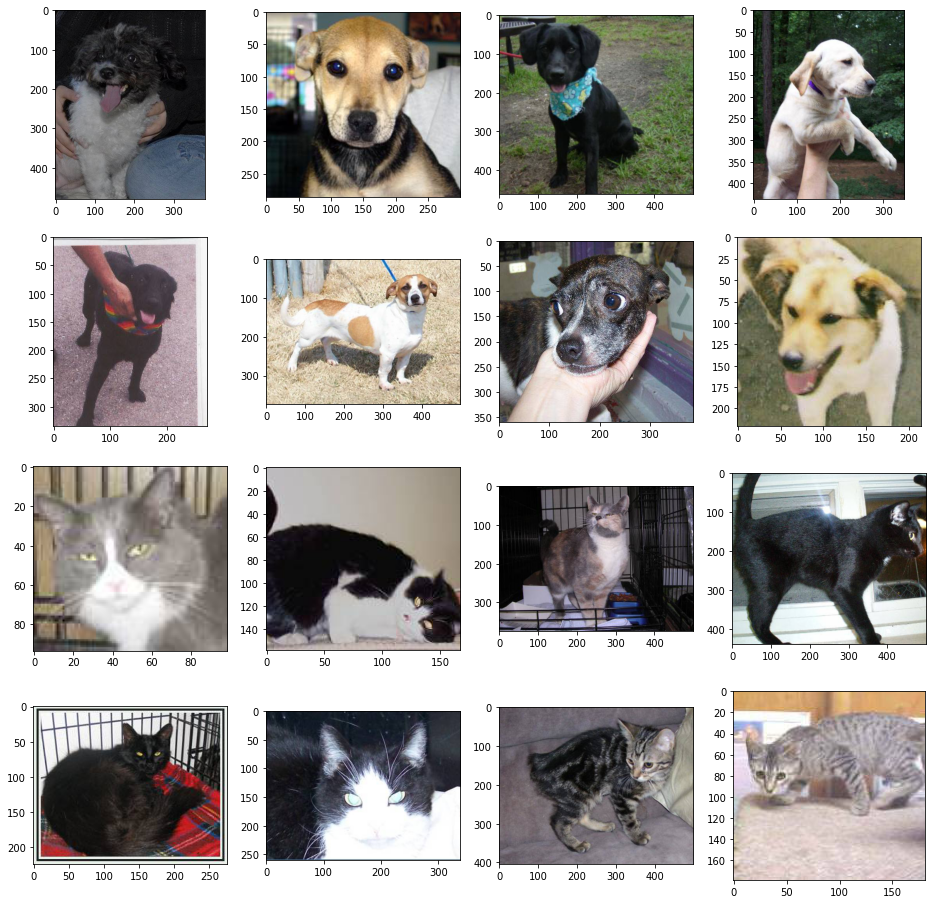

In [ ]:
#import matplotlib image and pyplot
import matplotlib.image as pltimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

canvas = plt.gcf()
canvas.set_size_inches(4*nrows, 4*ncols)

dogs_names_path = [os.path.join(train_dogs_dir, fname) for fname in train_dogs_names[0:8]]
cats_names_path = [os.path.join(train_cats_dir, fname) for fname in train_cats_names[0:8]]

for i, imgpath in enumerate(dogs_names_path+cats_names_path):
  img = pltimg.imread(imgpath)
  plt.subplot(nrows,ncols, i+1)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagenerator = ImageDataGenerator(1/255)
valid_datagenerator = ImageDataGenerator(1/255)

train_gen = train_datagenerator.flow_from_directory(train_dir, target_size= (300, 300), class_mode='binary', batch_size=20)
valid_gen = valid_datagenerator.flow_from_directory(valid_dir, target_size= (300, 300), class_mode='binary', batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (300,300,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),loss='BinaryCrossentropy', metrics='accuracy')

In [ ]:
history = model.fit(
    train_gen,
    epochs=15,
    steps_per_epoch = 50,
    validation_data = valid_gen,
    validation_steps = 25,
    verbose = 1
)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
50/50 [==============================] - 9s 165ms/step - loss: 219.3589 - accuracy: 0.5270 - val_loss: 0.8213 - val_accuracy: 0.5760
Epoch 2/15
50/50 [==============================] - 8s 159ms/step - loss: 0.7041 - accuracy: 0.6590 - val_loss: 0.8095 - val_accuracy: 0.5560
Epoch 3/15
50/50 [==============================] - 8s 156ms/step - loss: 6.7952 - accuracy: 0.6550 - val_loss: 0.9079 - val_accuracy: 0.5460
Epoch 4/15
50/50 [==============================] - 8s 158ms/step - loss: 1.8978 - accuracy: 0.6750 - val_loss: 1.0858 - val_accuracy: 0.5580
Epoch 5/15
50/50 [==============================] - 8s 158ms/step - loss: 3.3247 - accuracy: 0.7160 - val_loss: 0.7892 - val_accuracy: 0.5960
Epoch 6/15
50/50 [==============================] - 8s 156ms/step - loss: 2.5553 - accuracy: 0.7310 - val_loss: 7.7493 - val_accuracy: 0.5040
Epoch 7/15
50/50 [==============================] - 8s 159ms/step - loss: 2.1697 - accuracy: 0.7710 - val_loss: 1.2005 - val_accuracy: 0.6200
Epoc

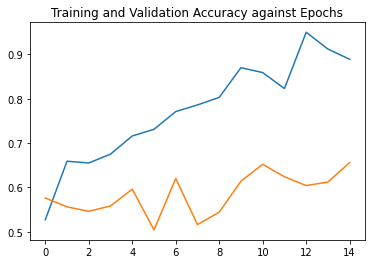

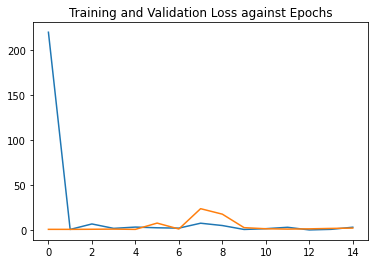

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(train_acc))
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, train_acc, val_acc)
plt.title('Training and Validation Accuracy against Epochs')
plt.show()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, train_loss, val_loss)
plt.title('Training and Validation Loss against Epochs')
plt.show()

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(300, 300))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  #images = np.vstack([x])
  
  classes = model.predict(x, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")
 

Saving cat-g9da85a0e4_1920.jpg to cat-g9da85a0e4_1920 (1).jpg
Saving cat-g3990ea4d1_1920.jpg to cat-g3990ea4d1_1920 (1).jpg
Saving dog-g83c671a2f_1920.jpg to dog-g83c671a2f_1920 (1).jpg
[0.84342253]
cat-g9da85a0e4_1920.jpg is a dog
[0.2559773]
cat-g3990ea4d1_1920.jpg is a cat
[0.8273745]
dog-g83c671a2f_1920.jpg is a dog


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


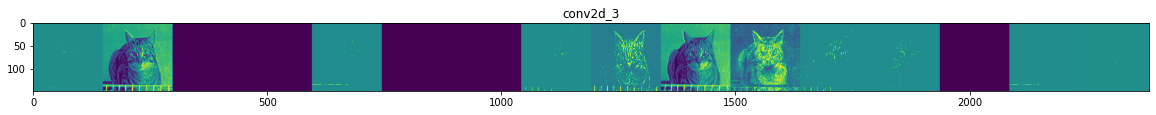

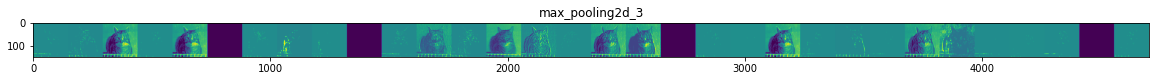

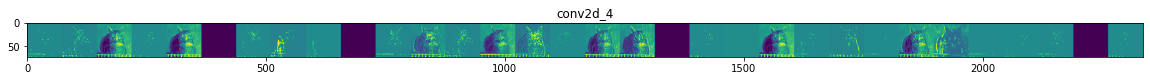

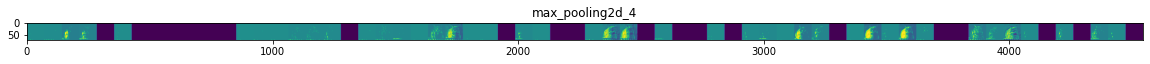

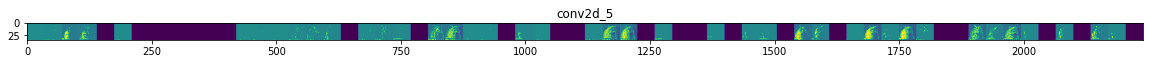

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_names]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_names]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(300, 300))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )